# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the __Department of Education, Training and Employment (DETE)__ and the __Technical and Further Education (TAFE)__ institute in Queensland, Australia.

We'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? - What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## Introduction

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the dataset
#Department of Education, Training and Employment (DETE)
dete_survey=pd.read_csv('dete_survey.csv')
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
#Getting information on the DETE data
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
#Technical and Further Education (TAFE)
tafe_survey=pd.read_csv('tafe_survey.csv')
tafe_survey.head()


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
# Getting information on the TAFE data
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
print('DETE columns are:','\n',dete_survey.columns)
print('\n')
print('TAFE columns are:','\n',tafe_survey.columns)

DETE columns are: 
 Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication

- The dete_survey dataframe contains values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains similar columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues.We'll read the dete_survey again this time specifying boolean values to be represented as nan and then drop irrelevant columns:

## Identifying Missing Values & Dropping Unnecessary Columns

In [7]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [8]:
#Let us drop irrelevant columns in DETE dataset
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [9]:
#Dropping irrelevant columns in TAFE dataset
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

## Cleaning Column Names

Let's turn our attention to the column names.Since the dataframes have similar names in some columns let us standardize them into similar names:

In [10]:
#First let us print out the column names for the two dataframes to identify those with different names but similar meaning
print('DETE column names are:','\n',dete_survey_updated.columns)
print('\n')
print('TAFE column names are:','\n',tafe_survey_updated.columns)

DETE column names are: 
 Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


TAFE column names are: 
 Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Caree

In [11]:
#Renaming the columns in DETE dataset
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
#Renaming columns in TAFE dataset to match those in DETE that are similar
mapping={'Record ID':'id','CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated=tafe_survey_updated.rename(mapping,axis=1)

In [13]:
#Checking to see changes have been made
print('DETE column names are:','\n',dete_survey_updated.columns)
print('\n')
print('TAFE column names are:','\n',tafe_survey_updated.columns)

DETE column names are: 
 Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


TAFE column names are: 
 Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
      

Looking at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

## Filtering the data

In [14]:
print('Reasons for ceasing work in DETE:','\n',dete_survey_updated['separationtype'].value_counts())
print('\n')
print('Reasons for ceasing work in TAFE:','\n',tafe_survey_updated['separationtype'].value_counts())

Reasons for ceasing work in DETE: 
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Reasons for ceasing work in TAFE: 
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


We can see that from the Department of Education, Training and Employment institute ,most of the employees stopped working simply because they resigned due to a factor of reasons or they had attained the age of retirement .

On the other hand,for the Technical and Further Education insititute the employees ceased working due to resignation,expiration of their contract or retrenchment/redundancy.

Since resignation tops the reason for ceasing work,let us work only with data from those who resigned:

In [15]:
print('Before standardization:','\n',dete_survey_updated['separationtype'].value_counts())
dete_survey_updated['separationtype']=dete_survey_updated['separationtype'].str.split('-').str[0]
print('\n')
print('After standardization:','\n',dete_survey_updated['separationtype'].value_counts())

Before standardization: 
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


After standardization: 
 Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64


In the DETE survey dataset,Resignation had been divided into three categories so we had to merge them all into one as Resignation.Let us now group both dataframes by Resignation:

In [16]:
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()


## Verifying the Data

In [17]:
#Let us inspect for inconsistencies
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

We can see that the date formats are not consistent throughout the rows.Let us use vectorized string methods to extract the year and convert it to a float to match with TAFE survey cease_date column :

In [18]:
#Extracting the year
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str[-1]
#Converting to a float
dete_resignations['cease_date']=dete_resignations['cease_date'].astype('float')

#Inspecting if changes have been made
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [20]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Both dataframes are not similar to one another as the cease_dates recorded vary from one dataframe to another.We'll leave them as it is.

## Creating a New Column

- Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column.
- In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.
- You may have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations:

In [21]:
dete_resignations['institute_service']=dete_resignations['cease_date'] - dete_resignations['dete_start_date']  
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

## Identifying Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied.Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:
__tafe_survey_updated:__
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

__dete_survey_updated:__
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

To create the new column, we'll do the following:

Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to :
- _True_: __indicates a person resigned because they were dissatisfied with the job__
- _False_: __indicates a person resigned because of a reason other than dissatisfaction with the job__
- _NaN_: __indicates the value is missing__


In [22]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
#Creating a function that updates values
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True


In [25]:
#Applying function to the columns in tafe resignations
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1,skipna=False)

#Inspecting the dissatified column
tafe_resignations_updated=tafe_resignations.copy()
tafe_resignations_updated['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [26]:
#Applying function to the columns in tafe resignations
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_updated = dete_resignations.copy()
dete_resignations_updated['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the data
Our end goal is to aggregate the data according to the institute_service column.First, let's add a column to each dataframe that will allow us to easily distinguish between the two:


In [27]:
dete_resignations_updated['institute']='DETE'
tafe_resignations_updated['institute']='TAFE'

#Combining the dataframes
combined=pd.concat([dete_resignations_updated,tafe_resignations_updated])
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
3,4.0,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Study                            332
Contributing Factors. NONE                             332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Other                            332
Contributing Factors. Dissatisfaction                  3

In [29]:
#Dropping columns with less than 500 non null values
combined.dropna(thresh=500,axis=1)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


In [30]:
#Checking to see changes have been made
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Study                            332
Contributing Factors. NONE                             332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Other                            332
Contributing Factors. Dissatisfaction                  3

In [31]:
#drop any columns with less than 500 non null values.
combined_updated=combined.dropna(thresh=500,axis=1).copy()

## Clean the Service Column

- Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column.
- To analyze the data, we'll convert these numbers into categories using the slightly modified definitions below:
  - __New__: Less than 3 years at a company
  - __Experienced__: 3-6 years at a company
  - __Established__: 7-10 years at a company
  - __Veteran__: 11 or more years at a company

In [32]:
#Inspecting the unique values in institute_service column
combined_updated['institute_service'].value_counts(dropna=False)
# def categorizer(service):
#     if service < 3:
#         return 'New'
#     elif service 3-6:
#         return 'Experienced'
#     elif service 7-10:
#         return 'Established'
#     else:
#         return 'Veteran'


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [33]:
#extracting the years of service from each value in the institute_service column.
combined_updated['institute_service_updated']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

# ( start a capture group
# \d a shorthand character class, which matches all numbers; it is the same as [0-9]
# + one or more of the expression
# ) end a capture group

# change the type to 'float'
combined_updated['institute_service_updated']=combined_updated['institute_service_updated'].astype('float')
#checking to see changes have been 
combined_updated['institute_service_updated'].value_counts()  
                                                                                            

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_updated, dtype: int64

In [34]:
#Creating a function that maps each year value to one of the career stages above.
def categorizer(service):
    if service < 3:
        return 'New'
    elif  3<=service<=6:
        return 'Experienced'
    elif 7<=service<=10:
        return 'Established'
    elif pd.isnull(service):
        return np.nan
    else:
        return 'Veteran'

#applying the function to the institute_service column.    
combined_updated['service_cat']=combined_updated['institute_service_updated'].map(categorizer)
#checking to see changes have been made
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

Recall that the dissatisfied column consists of Boolean value. Methods such as the df.pivot_table() treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.


In [35]:
#Checking unique values in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
#Using the fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
#Using the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group.
table=combined_updated.pivot_table(values='dissatisfied',index='service_cat')
print(table)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


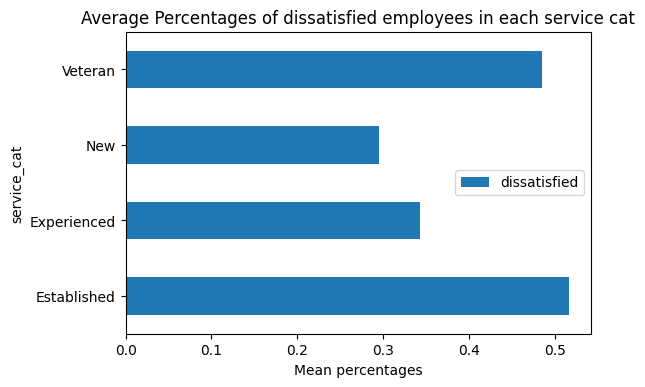

In [37]:
#plotting the results
table.plot(kind='barh')
plt.xlabel('Mean percentages')
plt.title('Average Percentages of dissatisfied employees in each service cat')
plt.show()

## Cleaning the Age column

In [38]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [39]:
#extracting the ages from each value in theage column.
combined_updated['age_updated']=combined_updated['age'].astype('str').str.extract(r'(\d+)')
#converting ages to a float
combined_updated['age_updated']=combined_updated['age_updated'].astype('float')
#checking to see changes have been made
combined_updated['age_updated'].value_counts()


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_updated, dtype: int64

In [40]:
#defining a function to categorize ages
def ager(ages):
    if ages < 50:
        return 'Young'
    elif  30<=ages<=55:
        return 'Middle_aged'
    elif pd.isnull(ages):
        return np.nan
    else:
        return 'Old'

#applying the function to the age column.    
combined_updated['age_cat']=combined_updated['age_updated'].map(ager)
#checking to see changes have been made
combined_updated['age_cat'].value_counts()

Young          447
Old             78
Middle_aged     71
Name: age_cat, dtype: int64

In [41]:
#Using the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group.
table1=combined_updated.pivot_table(values='dissatisfied',index='age_cat',margins=True)
print(table1)

             dissatisfied
age_cat                  
Middle_aged      0.422535
Old              0.423077
Young            0.364653
All              0.379195


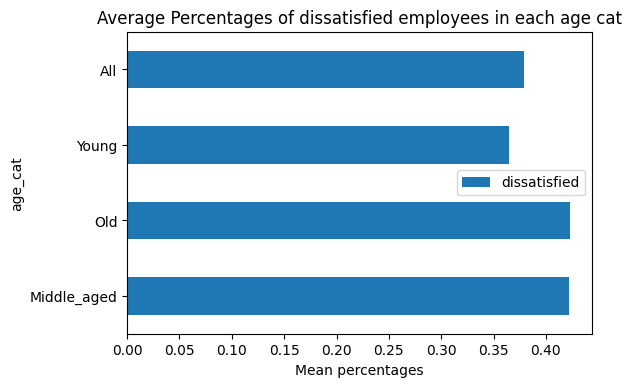

In [42]:
#plotting the results
table1.plot(kind='barh')
plt.xlabel('Mean percentages')
plt.title('Average Percentages of dissatisfied employees in each age cat')
plt.show()

## Conclusion


- 1.Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? - What about employees who have been there longer?
  - Answer:_Employees who have worked for more than 7 years i.e __'Veterans'__ & __'Established'__ are prone to resign due to some kind of dissatisfaction in the work environment._
- 2.Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
  - Answer:_Employees who are aged above 30,i.e __Old__ are prone to resign due to some kind of dissatisfaction in the work environment._

